# **Load all necessary libraries**

In [498]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ucimlrepo import fetch_ucirepo
from sklearn.datasets import fetch_openml
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [499]:
pip install ucimlrepo

# **Loading the data**

In [500]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [501]:
#fetch dataset from UCI repository
adult = fetch_openml(name='adult', version=2)

#convert data to pandas dataframe
df = pd.DataFrame(data=adult.data, columns=adult.feature_names)
df['target'] = adult.target

df.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning:

The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
5,34.0,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
6,29.0,NaN,227026.0,HS-grad,9.0,Never-married,NaN,Unmarried,Black,Male,0.0,0.0,40.0,United-States,<=50K
7,63.0,Self-emp-not-inc,104626.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.0,0.0,32.0,United-States,>50K
8,24.0,Private,369667.0,Some-college,10.0,Never-married,Other-service,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
9,55.0,Private,104996.0,7th-8th,4.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,10.0,United-States,<=50K


In [502]:
df.shape

(48842, 15)

In [503]:
df.dtypes

age                float64
workclass         category
fnlwgt             float64
education         category
education-num      float64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country    category
target            category
dtype: object

In [504]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
target               0
dtype: int64

In [505]:
df.nunique()

age                  74
workclass             8
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       41
target                2
dtype: int64

In [506]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [507]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')

# **EDA (Exploratory Data Analysis)**

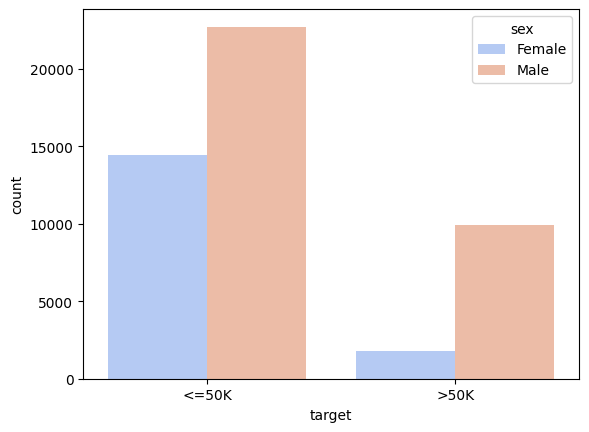

In [508]:
sns.countplot(x='target', palette='coolwarm', hue='sex', data=df)
plt.show()

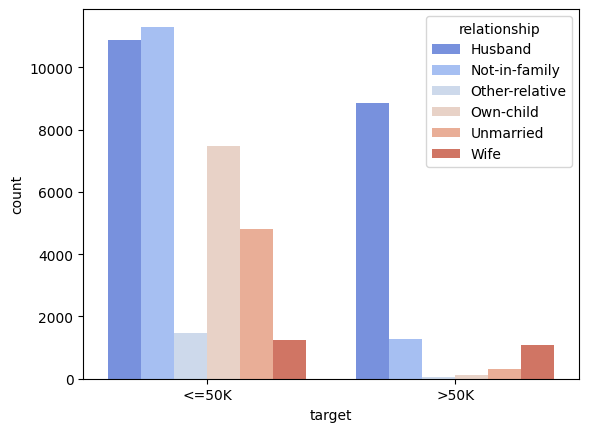

In [509]:
sns.countplot(x='target', palette='coolwarm', hue='relationship', data=df)
plt.show()

<ipython-input-510-2af366b0e523>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



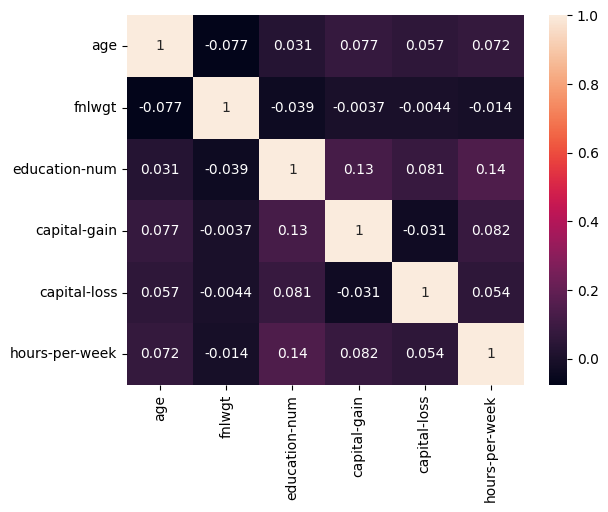

In [510]:
sns.heatmap(df.corr(), annot=True);

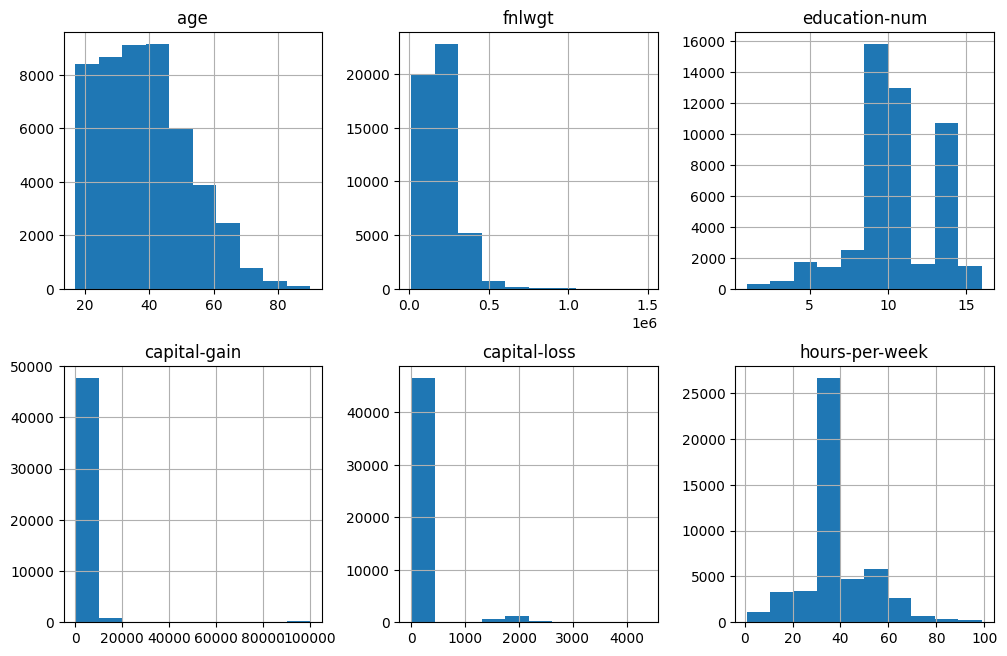

In [511]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

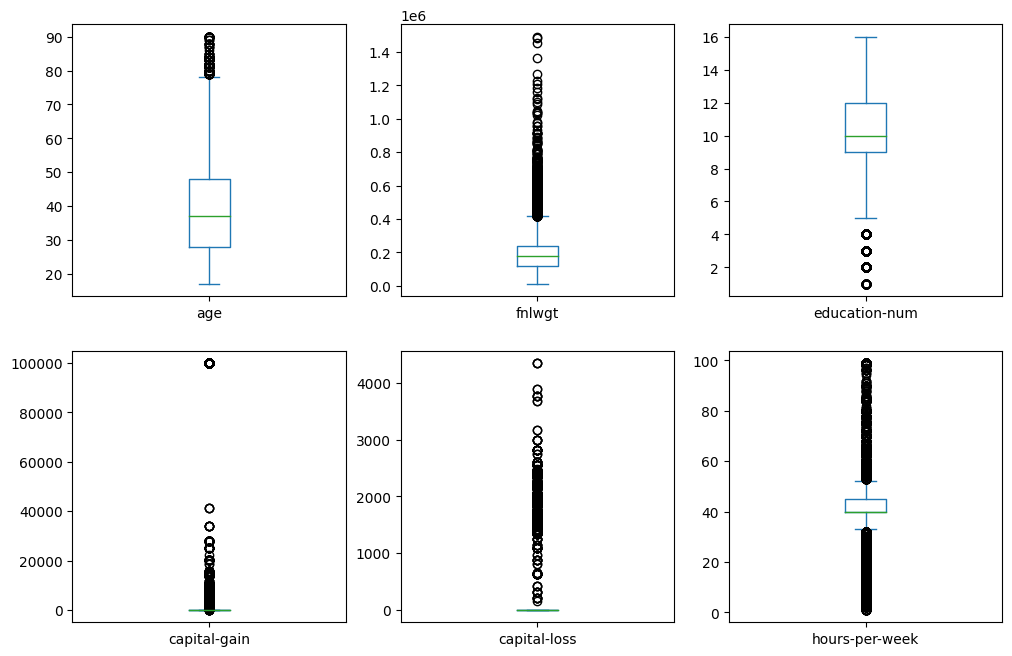

In [512]:
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

In [513]:
px.pie(df, values='education-num', names='education', title='% of edu', color_discrete_sequence = px.colors.qualitative.T10)

**Value Count**

In [514]:
df['age'].value_counts()

36.0    1348
35.0    1337
33.0    1335
23.0    1329
31.0    1325
        ... 
88.0       6
85.0       5
87.0       3
89.0       2
86.0       1
Name: age, Length: 74, dtype: int64

In [515]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [516]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [517]:
df['education-num'].value_counts()

9.0     15784
10.0    10878
13.0     8025
14.0     2657
11.0     2061
7.0      1812
12.0     1601
6.0      1389
4.0       955
15.0      834
5.0       756
8.0       657
16.0      594
3.0       509
2.0       247
1.0        83
Name: education-num, dtype: int64

In [518]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [519]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [520]:
df['capital-gain'].value_counts()

0.0        44807
15024.0      513
7688.0       410
7298.0       364
99999.0      244
           ...  
1111.0         1
7262.0         1
22040.0        1
1639.0         1
2387.0         1
Name: capital-gain, Length: 123, dtype: int64

In [521]:
df['capital-loss'].value_counts()

0.0       46560
1902.0      304
1977.0      253
1887.0      233
2415.0       72
          ...  
2465.0        1
2080.0        1
155.0         1
1911.0        1
2201.0        1
Name: capital-loss, Length: 99, dtype: int64

In [522]:
df['hours-per-week'].value_counts()

40.0    22803
50.0     4246
45.0     2717
60.0     2177
35.0     1937
        ...  
69.0        1
87.0        1
94.0        1
82.0        1
79.0        1
Name: hours-per-week, Length: 96, dtype: int64

In [523]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

# **Data Preprocessing**

**Feature Engineering**

In [524]:
#education category
df.education = df.education.replace(['Preschool', '11th', '10th', '7th-8th', '9th', '12th', '5th-6th', '1st-4th'], 'school')
df.education = df.education.replace(['HS-grad'], 'high school')
df.education = df.education.replace(['Some-college', 'Assoc-voc', 'Assoc-acdm', 'Prof-school'], 'higher')
df.education = df.education.replace(['Bachelors'], 'undergrad')
df.education = df.education.replace(['Masters'], 'grad')
df.education = df.education.replace(['Doctorate'], 'doc')

In [525]:
#marital status
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
df['marital-status'] = df['marital-status'].replace(['Never-married'], 'not-married')
df['marital-status'] = df['marital-status'].replace(['Divorced', 'Separated', 'Widowed', 'Married-spouse-absent'], 'other')

In [526]:
#income
df['target'] = df['target'].replace('<=50K', 0)
df['target'] = df['target'].replace('>50K', 1)

In [527]:
#native country
df['native-country'] = df['native-country'].replace(['United-States', 'Canada'], 'North America')
df['native-country'] = df['native-country'].replace(['Mexico', 'Puerto-Rico', 'El-Salvador', 'Cuba', 'Jamaica', 'Dominican-Republic', 'Haiti', 'Nicaragua', 'Honduras', 'Guatemala', 'Trinadad&Tobago'], 'Central America & Caribbean')
df['native-country'] = df['native-country'].replace(['Philippines', 'India', 'China', 'Vietnam', 'Japan', 'Taiwan', 'Iran', 'Hong', 'Thailand', 'Cambodia', 'Laos'], 'Asia')
df['native-country'] = df['native-country'].replace(['Germany', 'England', 'Italy', 'Poland', 'Portugal', 'France', 'Ireland', 'Scotland', 'Yugoslavia', 'Hungary', 'Greece', 'Holand-Netherlands'], 'Europe')

In [528]:
df.rename(columns={'target': 'income'}, inplace=True)
df.rename(columns={'sex': 'gender'}, inplace=True)
df.rename(columns={'fnlwgt': 'final-weight'}, inplace=True)

In [529]:
df.head(15)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.0,school,7.0,not-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,North America,0
1,38.0,Private,89814.0,high school,9.0,married,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,North America,0
2,28.0,Local-gov,336951.0,higher,12.0,married,Protective-serv,Husband,White,Male,0.0,0.0,40.0,North America,1
3,44.0,Private,160323.0,higher,10.0,married,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,North America,1
4,18.0,NaN,103497.0,higher,10.0,not-married,NaN,Own-child,White,Female,0.0,0.0,30.0,North America,0
5,34.0,Private,198693.0,school,6.0,not-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,North America,0
6,29.0,NaN,227026.0,high school,9.0,not-married,NaN,Unmarried,Black,Male,0.0,0.0,40.0,North America,0
7,63.0,Self-emp-not-inc,104626.0,higher,15.0,married,Prof-specialty,Husband,White,Male,3103.0,0.0,32.0,North America,1
8,24.0,Private,369667.0,higher,10.0,not-married,Other-service,Unmarried,White,Female,0.0,0.0,40.0,North America,0
9,55.0,Private,104996.0,school,4.0,married,Craft-repair,Husband,White,Male,0.0,0.0,10.0,North America,0


**Removing Outliers**

In [530]:
#calculate z-scores for all numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
z_scores = df[numerical_columns].apply(zscore)

In [531]:
#define the margin for outlier detection (3 standard deviations)
threshold = 3

#find the outliers based on z-scores in any numerical column
outliers_indices = z_scores[(np.abs(z_scores) > threshold).any(axis=1)].index

#remove all outliers from the dataframe
df_cleaned = df.drop(outliers_indices)

In [532]:
#print the length of the original dataframe and the cleaned dataframe to see how many outliers were removed
print("Original DataFrame length:", len(df))
print("Cleaned DataFrame length:", len(df_cleaned))

Original DataFrame length: 48842
Cleaned DataFrame length: 44717


**Handle missing values**

In [533]:
df['workclass'] = df['workclass'].replace('?', 'Private')
df['occupation'] = df['occupation'].replace('?', 'Prof-speciality')
df['native-country'] = df['native-country'].replace('?', 'United-States')

In [534]:
#replace missing values in categorical columns with mode
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [535]:
#replace missing values in numerical columns with median
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

# **Implementing models**

In [536]:
#splitting the dataset into training and testing sets
X = df_encoded.drop(columns=['income'])  #features
y = df_encoded['income']                 #target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#display information about the preprocessed dataset
print("Preprocessed dataset shape:", df_encoded.shape)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Preprocessed dataset shape: (48842, 15)
Training set shape: (39073, 14) (39073,)
Testing set shape: (9769, 14) (9769,)


# **Naives Bayes**

In [537]:
#one-hot encode categorical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
X_encoded = pd.get_dummies(X, columns=categorical_features)

#split the encoded dataset into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [538]:
#train naive bayes classifier
naive_bayes_encoded = GaussianNB()
naive_bayes_encoded.fit(X_train_encoded, y_train_encoded)

#predictions using naive bayes classifier
naive_bayes_predictions_encoded = naive_bayes_encoded.predict(X_test_encoded)

# **Random Forest**

In [539]:
#one-hot encode categorical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
X_encoded = pd.get_dummies(X, columns=categorical_features)

#split the encoded dataset into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [540]:
#train random forest classifier
random_forest_encoded = RandomForestClassifier(random_state=42)
random_forest_encoded.fit(X_train_encoded, y_train_encoded)

#predictions using random forest classifier
random_forest_predictions_encoded = random_forest_encoded.predict(X_test_encoded)

# **Evaluate Models**

**Naives** **Bayes**

Classification report

In [541]:
#evaluate naive bayes classifier
naive_bayes_accuracy_encoded = accuracy_score(y_test_encoded, naive_bayes_predictions_encoded)
naive_bayes_classification_report_encoded = classification_report(y_test_encoded, naive_bayes_predictions_encoded)

print("Naïve Bayes Classifier Accuracy:", naive_bayes_accuracy_encoded)
print("Naïve Bayes Classifier Classification Report:\n", naive_bayes_classification_report_encoded)

Naïve Bayes Classifier Accuracy: 0.7990582454703654
Naïve Bayes Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.65      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



Confusion matrix

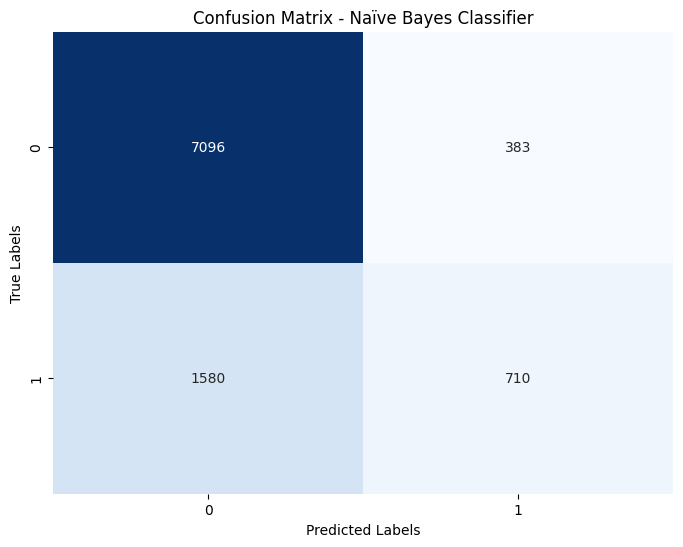

In [542]:
#compute confusion matrix for naive bayes classifier
naive_bayes_conf_matrix = confusion_matrix(y_test_encoded, naive_bayes_predictions_encoded)

#plot confusion matrix for naive bayes classifier
plt.figure(figsize=(8, 6))
sns.heatmap(naive_bayes_conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - Naïve Bayes Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**Random Forest**

Classification report

In [543]:
#evaluate random forest classifier
random_forest_accuracy_encoded = accuracy_score(y_test_encoded, random_forest_predictions_encoded)
random_forest_classification_report_encoded = classification_report(y_test_encoded, random_forest_predictions_encoded)

print("Random Forest Classifier Accuracy:", random_forest_accuracy_encoded)
print("Random Forest Classifier Classification Report:\n", random_forest_classification_report_encoded)

Random Forest Classifier Accuracy: 0.8623195823523391
Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.64      0.69      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769



Confusion matrix

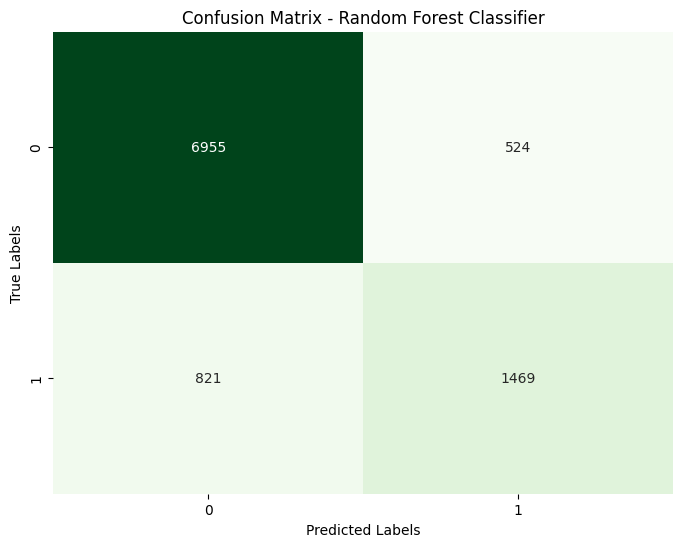

In [544]:
#compute confusion matrix for random forest classifier
random_forest_conf_matrix = confusion_matrix(y_test_encoded, random_forest_predictions_encoded)

#plot confusion matrix for random forest classifier
plt.figure(figsize=(8, 6))
sns.heatmap(random_forest_conf_matrix, annot=True, cmap="Greens", fmt="d", cbar=False)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()